## CODE ON BYTES

DATASCIENCE INTERN

PHASE-2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/CodeOnBytes Internship/dataset - netflix1.csv")
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [ ]:
data.head()

,show_id,type,title,director,country,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [ ]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
!pip install typing_extensions

In [ ]:
pip install pandas_profiling==3.6.6

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

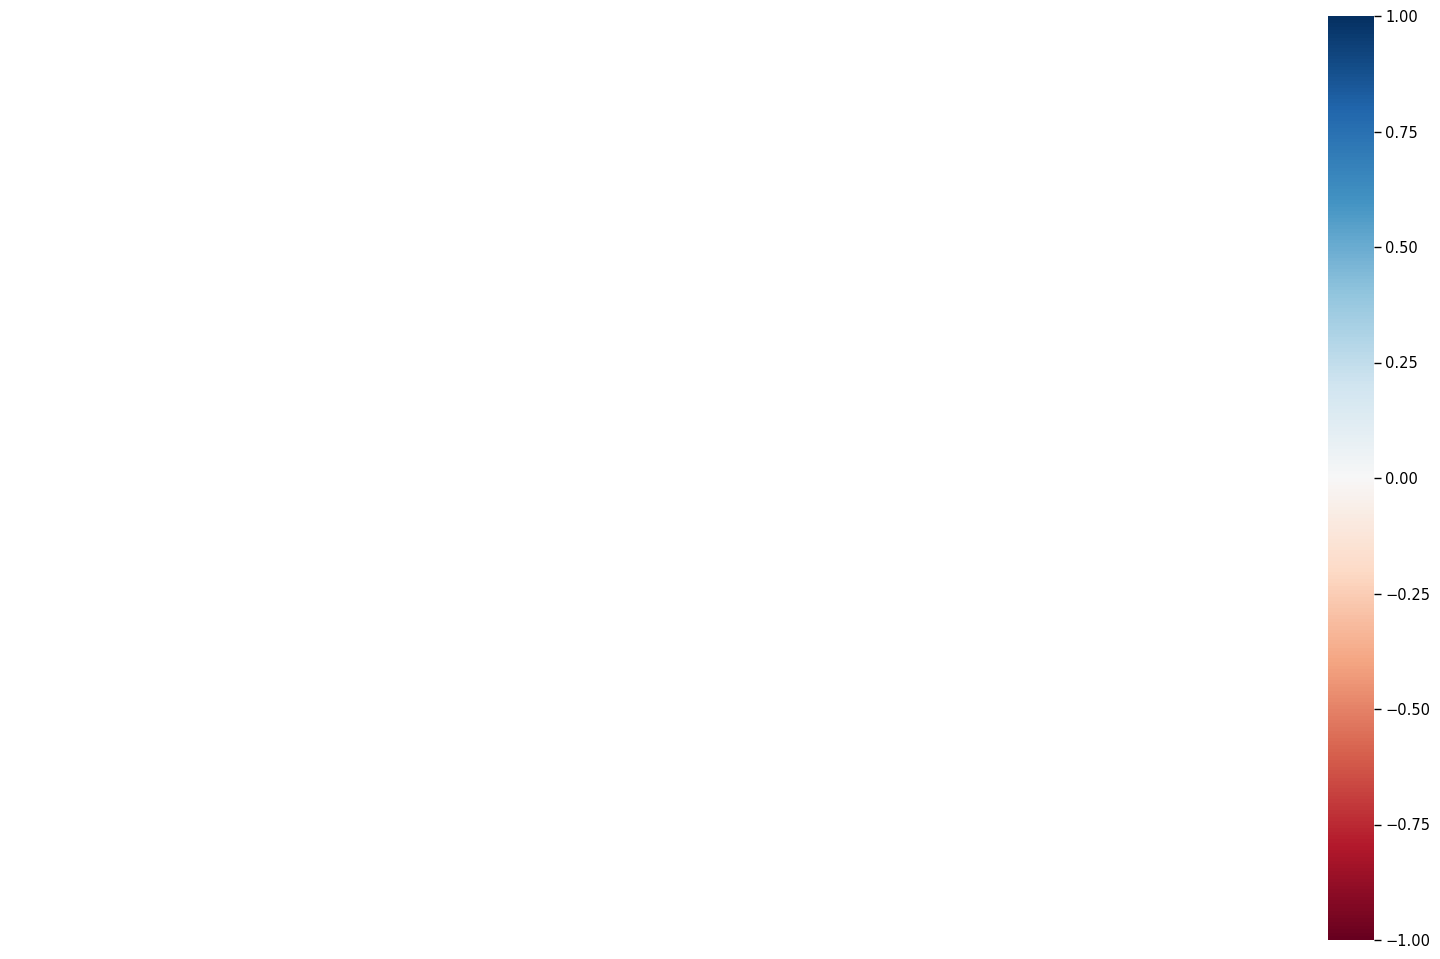

In [ ]:
import missingno as msno
msno.heatmap(data)

In [ ]:
data.drop([ 'date_added'], axis=1, inplace=True)

In [ ]:
data.isnull().sum()


show_id         0
type            0
title           0
director        0
country         0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

Total actors in US netflix is 1982


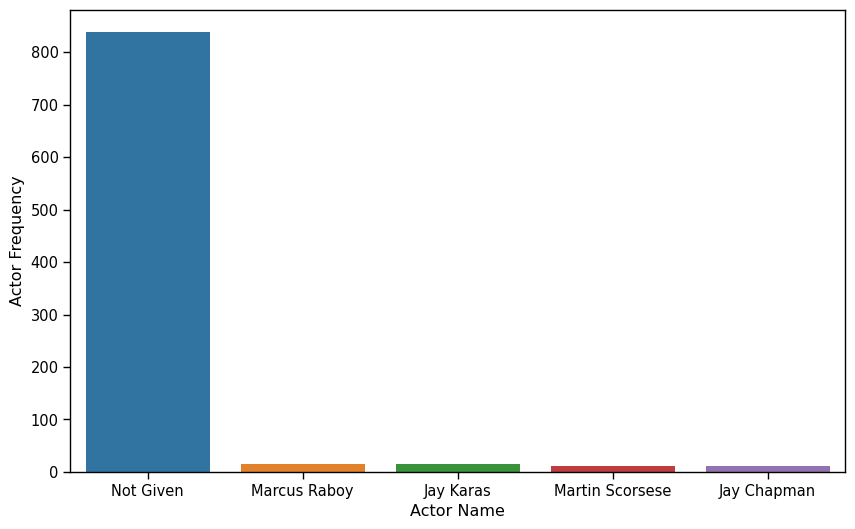

In [ ]:

# Used for choosing most frequently shown country.
from collections import Counter

df_us = data[data['country'] == 'United States']
actor_list = [(lambda x: x)(x.strip()) for x in ','.join(df_us['director']).split(',')]
counter_list = Counter(actor_list).most_common(5)
actor_name = [(lambda x : x)(x[0]) for x in counter_list]
actor_frequency = [(lambda x : x)(x[1]) for x in counter_list]
us_actor = pd.DataFrame({'actor_name': actor_name, 'actor_frequency' : actor_frequency},
                       columns=['actor_name', 'actor_frequency'])

#Total 13772 actors has shown up in US movie and TV show
my_set = set(actor_list)
print("Total actors in US netflix is " + str(len(my_set)))

#Visualizing using seaborn
plt.figure(figsize=(10,6))
sns.set_context('paper', font_scale=1.2)
sns.barplot(x='actor_name', y='actor_frequency', data=us_actor)
plt.xlabel('Actor Name')
plt.ylabel('Actor Frequency')
plt.show()

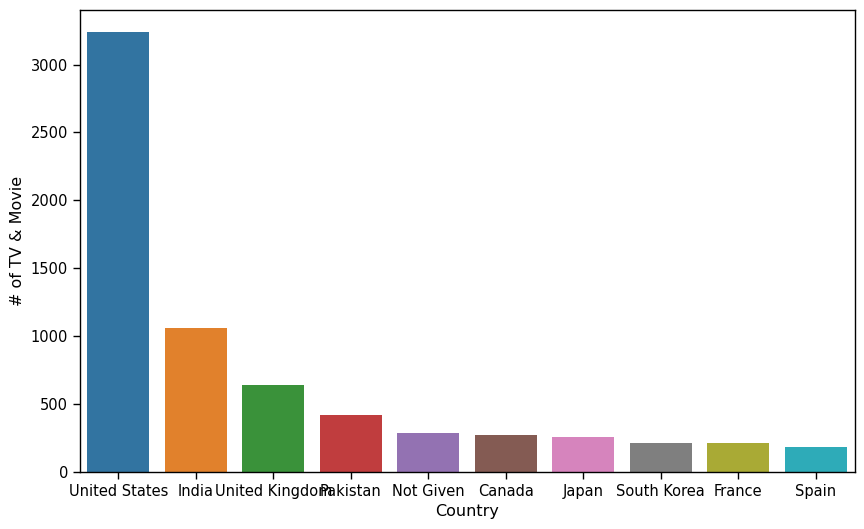

In [ ]:
#Making new DataFrame by using country and type features
count_type = data.groupby(['country']).count()
most_country = count_type['type'].to_frame().reset_index().sort_values(by='type', ascending=False)[:10]

#Visualizing using seaborn
plt.figure(figsize=(10,6))
sns.set_context('paper', font_scale=1.2)
sns.barplot(x='country', y='type', data=most_country)
plt.ylabel('# of TV & Movie')
plt.xlabel('Country')
plt.show()

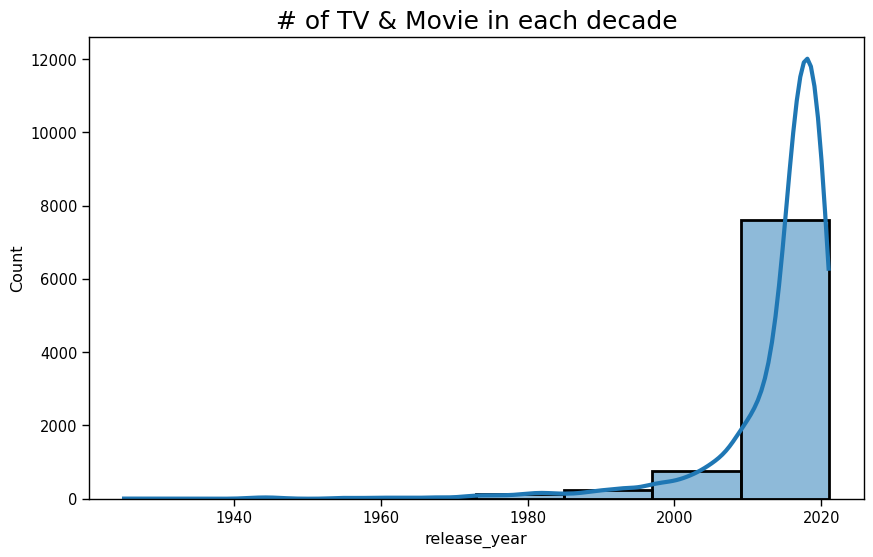

In [ ]:
plt.figure(figsize=(10,6))
plt.title('# of TV & Movie in each decade', fontsize=18)
sns.set_context("poster", font_scale = 0.8)
sns.histplot(data['release_year'], bins=8, kde=True)
plt.show()

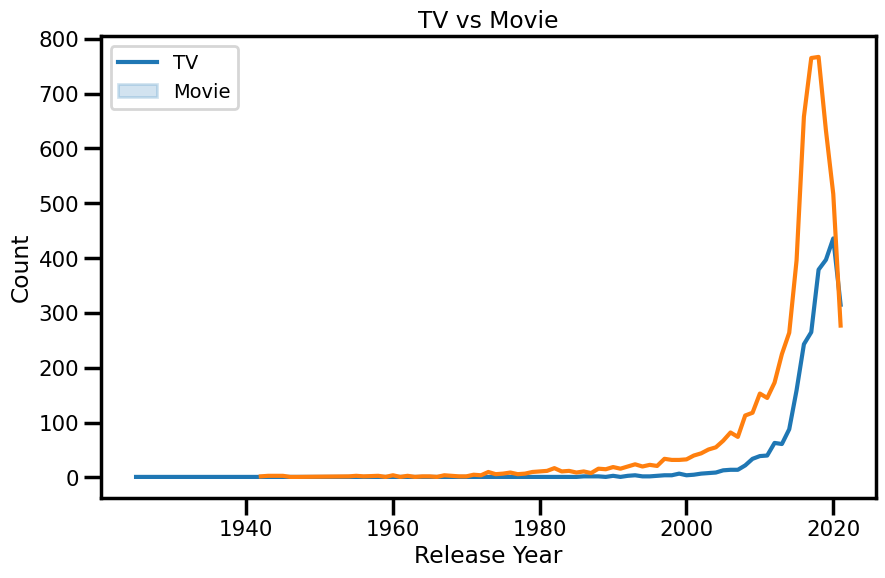

In [ ]:
#Making new dataframe to seperate TV & Movie
df_TV = data[data['type']=='TV Show'].groupby('release_year').count()
df_Movie = data[data['type']=='Movie'].groupby('release_year').count()

#Visualizing using matplotlib
plt.figure(figsize=(10,6))
sns.set_context("poster", font_scale = 0.7)
sns.lineplot(data=df_TV['show_id'], sizes=10)
sns.lineplot(data=df_Movie['show_id'])
plt.ylabel('Count')
plt.xlabel('Release Year')
plt.legend(['TV', 'Movie'], fontsize='small')
plt.title('TV vs Movie')
plt.show()

In [ ]:
import plotly.express as px
year_country= data.groupby('release_year')['country'].value_counts().reset_index(name='counts')

fig = px.choropleth(year_country, locations="country", color="counts",
                    locationmode='country names',
                    animation_frame='release_year',
                    range_color=[0,200],
                    color_continuous_scale=px.colors.sequential.OrRd
                   )

fig.update_layout(title='Comparison by country')
fig.show()

CODE ON BYTES

DATASCIENCE INTERN

TRAIN AND PREDICT USING LINEAR REGRESSION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [92]:
train=pd.read_excel("/content/drive/MyDrive/CodeOnBytes Internship/traindata.xlsx")
train

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [93]:
x_train=train.iloc[:,0:1]
x_train

,x
0,24.0
1,50.0
2,15.0
3,38.0
4,87.0
...,...
695,58.0
696,93.0
697,82.0
698,66.0


In [94]:
x_train.shape

(700, 1)

In [99]:
y_train.shape


(700, 1)

In [97]:
x_test.shape



(300, 1)

In [96]:
y_test.shape

(300, 1)

In [98]:
y_train=train.iloc[:,1:]
y_train

,y
0,21.549452
1,47.464463
2,17.218656
3,36.586398
4,87.288984
...,...
695,58.595006
696,94.625094
697,88.603770
698,63.648685


In [61]:
test=pd.read_excel("/content/drive/MyDrive/CodeOnBytes Internship/testdata.xlsx")
test

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [63]:
x_test=test.iloc[:,0:1]
x_test

,x
0,77
1,21
2,22
3,20
4,36
...,...
295,71
296,46
297,55
298,62


In [64]:
y_test=test.iloc[:,1:]
y_test

,y
0,79.775152
1,23.177279
2,25.609262
3,17.857388
4,41.849864
...,...
295,68.545888
296,47.334876
297,54.090637
298,63.297171


In [88]:
train.isnull().sum()

x    0
y    1
dtype: int64

In [66]:
test.isnull().sum()

x    0
y    0
dtype: int64

In [100]:
y_train.replace([np.inf, -np.inf], np.nan, inplace=True)
print(y_train)

             y
0    21.549452
1    47.464463
2    17.218656
3    36.586398
4    87.288984
..         ...
695  58.595006
696  94.625094
697  88.603770
698  63.648685
699  94.975266

[700 rows x 1 columns]


<ipython-input-100-30746b87fb6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.replace([np.inf, -np.inf], np.nan, inplace=True)


In [101]:
from sklearn.impute import SimpleImputer
SI=SimpleImputer(missing_values=np.nan,strategy='median')
SI.fit(train.iloc[:,1:])
train.iloc[:,1:]=SI.transform(train.iloc[:,1:])

In [91]:
y_train.shape

(699, 1)

In [35]:
np.any(np.isnan(train))

False

In [37]:
np.all(np.isfinite(train))

True

In [102]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


In [104]:
lr.fit(x_train,y_train)

LinearRegression()

In [107]:
y_pred=lr.predict(x_test)
y_pred

array([[50.94932458],
       [48.37792936],
       [48.42384713],
       [48.33201159],
       [49.06669594],
       [48.10242273],
       [50.26055801],
       [51.77584448],
       [48.33201159],
       [47.64324501],
       [47.59732724],
       [48.28609381],
       [51.82176225],
       [50.26055801],
       [49.06669594],
       [48.10242273],
       [50.39831132],
       [48.05650496],
       [51.4085023 ],
       [50.58198241],
       [51.50033785],
       [49.75546252],
       [51.50033785],
       [48.65343599],
       [51.86768002],
       [50.07688692],
       [51.04116013],
       [48.37792936],
       [51.68400894],
       [48.65343599],
       [51.95951557],
       [48.83710708],
       [48.92894262],
       [51.0870779 ],
       [48.69935376],
       [49.57179143],
       [49.84729806],
       [50.58198241],
       [48.69935376],
       [48.92894262],
       [51.59217339],
       [50.67381795],
       [49.70954474],
       [50.90340681],
       [47.59732724],
       [49

In [111]:
from sklearn.metrics import accuracy_score,classification_report
lr.score(y_pred, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.001412115415848958